# Hitter

In [2]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [3]:
df_hitter_perf.columns,df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A',
        u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B',
        u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting',
        u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age',
        u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary',
        u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar',
        u'Interest', u'Inflation', u'Hometown', u'RewardPlayer',
        u'PreviousTeam', u'NewTeam', u'Position'],
       dtype='object'))

In [4]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Salary']

In [5]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter['Salary'][idx] = 0
df_hitter = sm.add_constant(df_hitter).astype(float)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [6]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
df_hitter.describe()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,wOBA_A,wRC_A,wRAA_A,AVG_B,OBP_B,SLG_B,WAR_B,HR_B,BB_B,K_B,BIPA_B,Spd_B,PSN_B,wOBA_B,wRC_B,wRAA_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
count,125.0,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02,125.000000,1.250000e+02,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.0000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.0,0.307088,0.389368,0.484120,4.937040,3.10552,10.629600,13.980000,0.333856,4.528800,10.243680,0.388960,83.110400,23.602400,0.279256,0.363096,0.422840,2.344800,2.463760,10.411200,15.175200,0.311360,3.608000,4.713200,0.355152,54.498400,7.214400,5.276634e+06,251.973440,1.191661e+06,8.512000,4.312000,8.704000,34.44800,0.376000,0.680000,0.7760,0.456000,0.280000,1.568000,0.104000,4.168000,6.791680
std,0.0,0.028798,0.037477,0.086538,2.104512,1.92635,3.279458,4.174036,0.027876,1.672685,7.815597,0.044918,27.793419,20.229364,0.039206,0.043117,0.092773,1.761019,1.818149,3.222081,4.959134,0.040938,1.557894,4.411567,0.050292,30.433007,16.878029,1.980147e+06,177.629111,3.025869e+05,0.768492,2.733944,3.136733,2.56671,0.486329,0.468353,0.4186,0.500065,0.450806,1.964754,0.306489,3.063142,5.060301
min,1.0,0.236000,0.298000,0.321000,0.280000,0.00000,3.300000,5.500000,0.260000,1.300000,0.000000,0.282000,9.300000,-14.600000,0.157000,0.261000,0.196000,-0.540000,0.000000,2.400000,7.500000,0.200000,0.100000,0.000000,0.246000,0.400000,-32.100000,2.331978e+06,46.000000,5.768730e+05,8.000000,0.000000,1.000000,28.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.289000,0.366000,0.419000,3.420000,1.59000,8.300000,11.000000,0.320000,3.100000,3.780000,0.359000,66.800000,8.200000,0.256000,0.335000,0.367000,1.000000,1.030000,8.000000,11.400000,0.288000,2.700000,1.670000,0.322000,33.600000,-3.300000,3.387843e+06,90.000000,9.197970e+05,8.000000,2.000000,7.000000,33.00000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000
50%,1.0,0.308000,0.384000,0.475000,5.150000,2.98000,10.300000,13.500000,0.333000,4.400000,8.730000,0.388000,82.300000,21.500000,0.284000,0.366000,0.418000,2.090000,2.250000,10.000000,14.200000,0.309000,3.500000,3.640000,0.355000,55.000000,4.500000,5.928626e+06,212.000000,1.265308e+06,8.000000,3.000000,9.000000,34.00000,0.000000,1.000000,1.0000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000
75%,1.0,0.324000,0.409000,0.536000,5.970000,4.25000,12.500000,16.300000,0.353000,5.700000,14.440000,0.416000,99.100000,35.500000,0.307000,0.389000,0.480000,3.370000,3.570000,12.400000,17.900000,0.339000,4.500000,6.860000,0.389000,74.900000,15.500000,6.810028e+06,302.000000,1.429445e+06,9.000000,7.000000,12.000000,36.00000,1.000000,1.000000,1.0000,1.000000,1.000000,3.000000,0.000000,7.000000,8.750000
max,1.0,0.393000,0.478000,0.720000,11.770000,8.82000,20.600000,28.100000,0.402000,8.300000,32.730000,0.498000,154.700000,80.700000,0.376000,0.464000,0.789000,8.390000,9.400000,18.700000,28.700000,0.442000,7.800000,21.330000,0.480000,154.700000,68.100000,8.339577e+06,560.000000,1.623840e+06,10.000000,9.000000,12.000000,42.00000,1.000000,1.000000,1.0000,1.000000,1.000000,9.000000,1.000000,12.000000,25.000000


- wRAA_A, WAR_B, wRAA_B -> 음수값 존재

# 1. OLS

In [8]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression().fit(df_hitter.ix[:,:-1], df_hitter.ix[:,-1])
model_sm = sm.OLS(df_hitter.ix[:,-1], df_hitter.ix[:,:-1])
result_sm = model_sm.fit()

In [9]:
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     7.913
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           1.22e-15
Time:                        06:28:20   Log-Likelihood:                -280.11
No. Observations:                 125   AIC:                             644.2
Df Residuals:                      83   BIC:                             763.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3964     26.179      0.

# 2. Pairplot

dff = pd.concat([df_hitter.ix[:,1:14], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

dff = pd.concat([df_hitter.ix[:,14:27], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

dff = pd.concat([df_hitter.ix[:,27:-1], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

### 히스토그램 관찰 결과
SLG_A, WAR_A, HR%_A, BB%_A, K%_A, Spd_A, PSN_A, wRAA_A, SLG_B, WAR_B, HR%_B, K%_B, PSN_B, WRC_B, wRAA_B, Spectators, Broadcasting, GDP, GoldenGlove, Allstar 
이 변수들을 로그 변환 해주기로 함

# 3.  로그변환 

In [10]:
#로그변환
df_hitter1 = df_hitter.copy()

#df_hitter1["LogHR_A"]= np.log(df_hitter1["HR_A"]+1)
df_hitter1["LogBB_A"]= np.log(df_hitter1["BB_A"]+0)
df_hitter1["LogK_A"]= np.log(df_hitter1["K_A"]+0)
#df_hitter1["LogSpd_A"]= np.log(df_hitter1["Spd_A"]+0)
df_hitter1["LogPSN_A"]= np.log(df_hitter1["PSN_A"]+1)
df_hitter1["LogwRAA_A"]= np.log(df_hitter1["wRAA_A"]+15.6)   #  마이너스

df_hitter1["LogSLG_B"]= np.log(df_hitter1["SLG_B"]+0.804)
df_hitter1["LogWAR_B"]= np.log(df_hitter1["WAR_B"]+1.54)   # 마이너스 
df_hitter1["LogPSN_B"]= np.log(df_hitter1["PSN_B"]+1)    # 질문
df_hitter1["LogHR_B"]= np.log(df_hitter1["HR_B"]+ 1)
df_hitter1["LogK_B"]= np.log(df_hitter1["K_B"]+0)
df_hitter1["LogwRAA_B"]= np.log(df_hitter1["wRAA_B"]+70)   # 마이너스

df_hitter1["LogSpectators"]= np.log(df_hitter1["Spectators"]+0)   # etc 변수들 질문
df_hitter1["LogBroadcasting"]= np.log(df_hitter1["Broadcasting"]+0)
df_hitter1["LogGDP"]= np.log(df_hitter1["GDP"]+0)
#df_hitter1["LogGoldenGlove"]= np.log(df_hitter1["GoldenGlove"]+1)
df_hitter1["LogAllStar"]= np.log(df_hitter1["AllStar"]+1)

df_hitter1["LogSalary"]= np.log(df_hitter1["Salary"]+ 1)

#del df_hitter1["HR_A"]
del df_hitter1["BB_A"]
del df_hitter1["K_A"]
#del df_hitter1["Spd_A"]
del df_hitter1["PSN_A"]
del df_hitter1["wRAA_A"]

del df_hitter1["SLG_B"]
del df_hitter1["WAR_B"]
del df_hitter1["HR_B"]
del df_hitter1["PSN_B"]
del df_hitter1["K_B"]
del df_hitter1["wRAA_B"]

del df_hitter1["Spectators"]
del df_hitter1["Broadcasting"]
del df_hitter1["GDP"]
#del df_hitter1["GoldenGlove"]
del df_hitter1["AllStar"]

del df_hitter1["Salary"]

In [11]:
df_hitter1.tail()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BIPA_A,Spd_A,wOBA_A,wRC_A,AVG_B,OBP_B,BB_B,BIPA_B,Spd_B,wOBA_B,wRC_B,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,LogBB_A,LogK_A,LogPSN_A,LogwRAA_A,LogSLG_B,LogWAR_B,LogPSN_B,LogHR_B,LogK_B,LogwRAA_B,LogSpectators,LogBroadcasting,LogGDP,LogAllStar,LogSalary
121,1.0,0.287,0.394,0.474,4.23,4.02,0.338,2.5,0.400,86.7,0.308,0.451,17.5,0.342,4.1,0.450,108.3,10.0,6.0,8.0,33.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.476538,3.058707,2.442347,3.691376,0.318454,1.701105,2.368373,1.814825,2.917771,4.702297,15.936523,6.327937,14.300304,1.098612,2.397895
122,1.0,0.282,0.350,0.413,1.45,1.41,0.316,3.9,0.354,54.8,0.335,0.408,10.1,0.410,3.4,0.404,37.5,10.0,6.0,8.0,36.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.219203,2.580217,1.757858,2.975530,0.263133,1.000632,1.558145,1.229641,3.034953,4.363099,15.936523,6.327937,14.300304,0.000000,1.178655
123,1.0,0.310,0.411,0.499,5.50,2.74,0.341,3.2,0.416,78.0,0.322,0.380,7.9,0.365,4.1,0.369,62.1,10.0,6.0,8.0,38.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.694627,2.653242,1.757858,3.835142,0.214305,1.068153,2.061787,0.891998,2.646175,4.297285,15.936523,6.327937,14.300304,2.197225,2.079442
124,1.0,0.328,0.408,0.520,5.33,3.03,0.362,5.6,0.404,98.8,0.332,0.403,10.6,0.351,2.3,0.400,74.9,10.0,6.0,8.0,38.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.397895,2.602690,2.609334,3.850148,0.249980,1.163151,1.465568,1.211941,2.341806,4.448516,15.936523,6.327937,14.300304,2.197225,2.140066
125,1.0,0.305,0.326,0.402,0.28,1.09,0.387,2.2,0.316,9.3,0.212,0.272,6.9,0.244,2.1,0.262,6.0,10.0,6.0,8.0,37.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.193922,3.173878,0.000000,2.484907,0.097127,0.322083,0.000000,1.000632,2.895912,4.089332,15.936523,6.327937,14.300304,0.000000,0.000000


In [12]:
cols = df_hitter1.columns.tolist()
cols = cols[:10] + cols[28:33] + cols[10:17] + cols[33:38] + cols[17:28]+ cols[38:]
df_hitter1 = df_hitter1[cols]

In [13]:
model_sm1 = sm.OLS(df_hitter1.ix[:,-1], df_hitter1.ix[:,:-1])
result_sm1 = model_sm1.fit()
print(result_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     11.05
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           4.33e-20
Time:                        06:28:27   Log-Likelihood:                -8.1582
No. Observations:                 125   AIC:                             100.3
Df Residuals:                      83   BIC:                             219.1
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -18.2551      9.518     

dff = pd.concat([df_hitter1.ix[:,1:20], df_hitter1.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

dff = pd.concat([df_hitter1.ix[:,20:-1], df_hitter1.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

# 4. Heatmap 

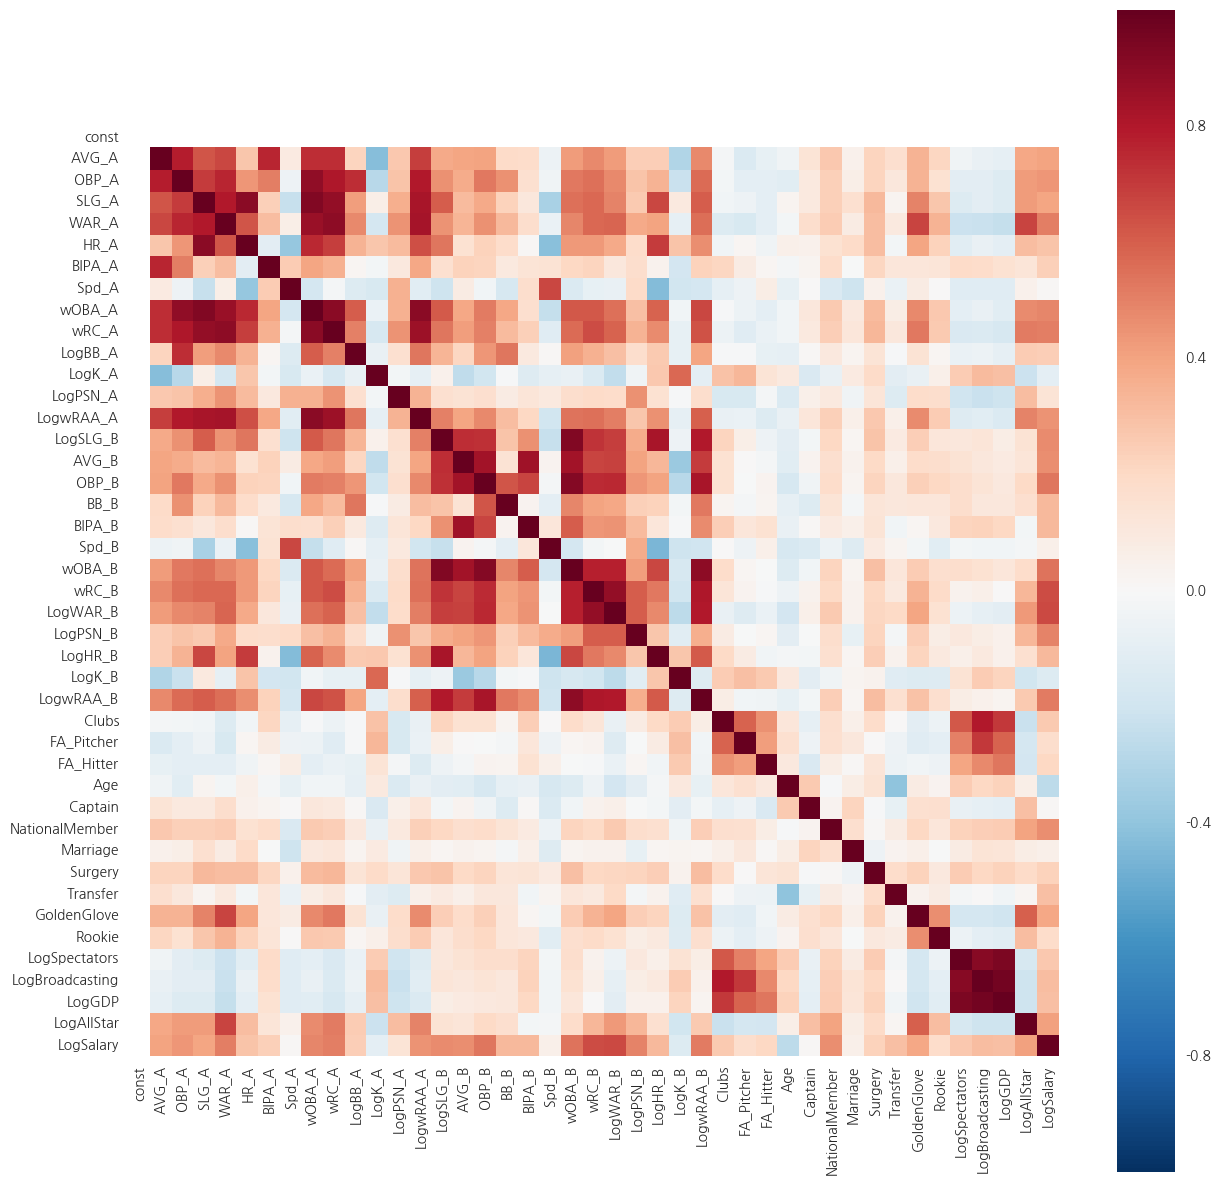

In [14]:
plt.figure(figsize=(15,15))
cormat = df_hitter1.corr()
sns.heatmap(cormat, square=True)
plt.savefig('heatmap')

In [151]:
df_hitter2 = df_hitter1.copy()

del df_hitter2["LogSpectators"]
del df_hitter2['LogBroadcasting']
del df_hitter2['Clubs']
#del df_hitter2['LogAllStar']
del df_hitter2['GoldenGlove']
del df_hitter2['Captain']
del df_hitter2['Marriage']
del df_hitter2['Rookie']
del df_hitter2['Surgery']
del df_hitter2['Transfer']
#del df_hitter2['LogGDP']
del df_hitter2['FA_Pitcher']
del df_hitter2['FA_Hitter']

del df_hitter2['LogwRAA_B']
del df_hitter2['wOBA_B']
del df_hitter2['wRC_B']
del df_hitter2['AVG_B']
del df_hitter2['LogSLG_B']
del df_hitter2['OBP_B']
del df_hitter2['Spd_B']
del df_hitter2['LogPSN_B']
del df_hitter2['LogK_B']
del df_hitter2['BIPA_B']
del df_hitter2['BB_B']
del df_hitter2['LogHR_B']
               
del df_hitter2['LogwRAA_A']
del df_hitter2['wOBA_A']
del df_hitter2['wRC_A']
del df_hitter2['AVG_A']
del df_hitter2['OBP_A']
del df_hitter2['SLG_A']
del df_hitter2['HR_A']
del df_hitter2['LogK_A']
del df_hitter2['LogBB_A']
del df_hitter2['Spd_A']
del df_hitter2['BIPA_A']
del df_hitter2['LogPSN_A']
del df_hitter2['WAR_A']




In [152]:
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     56.65
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           7.16e-30
Time:                        07:23:14   Log-Likelihood:                -48.601
No. Observations:                 125   AIC:                             109.2
Df Residuals:                     119   BIC:                             126.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.6708      1.855     -6.

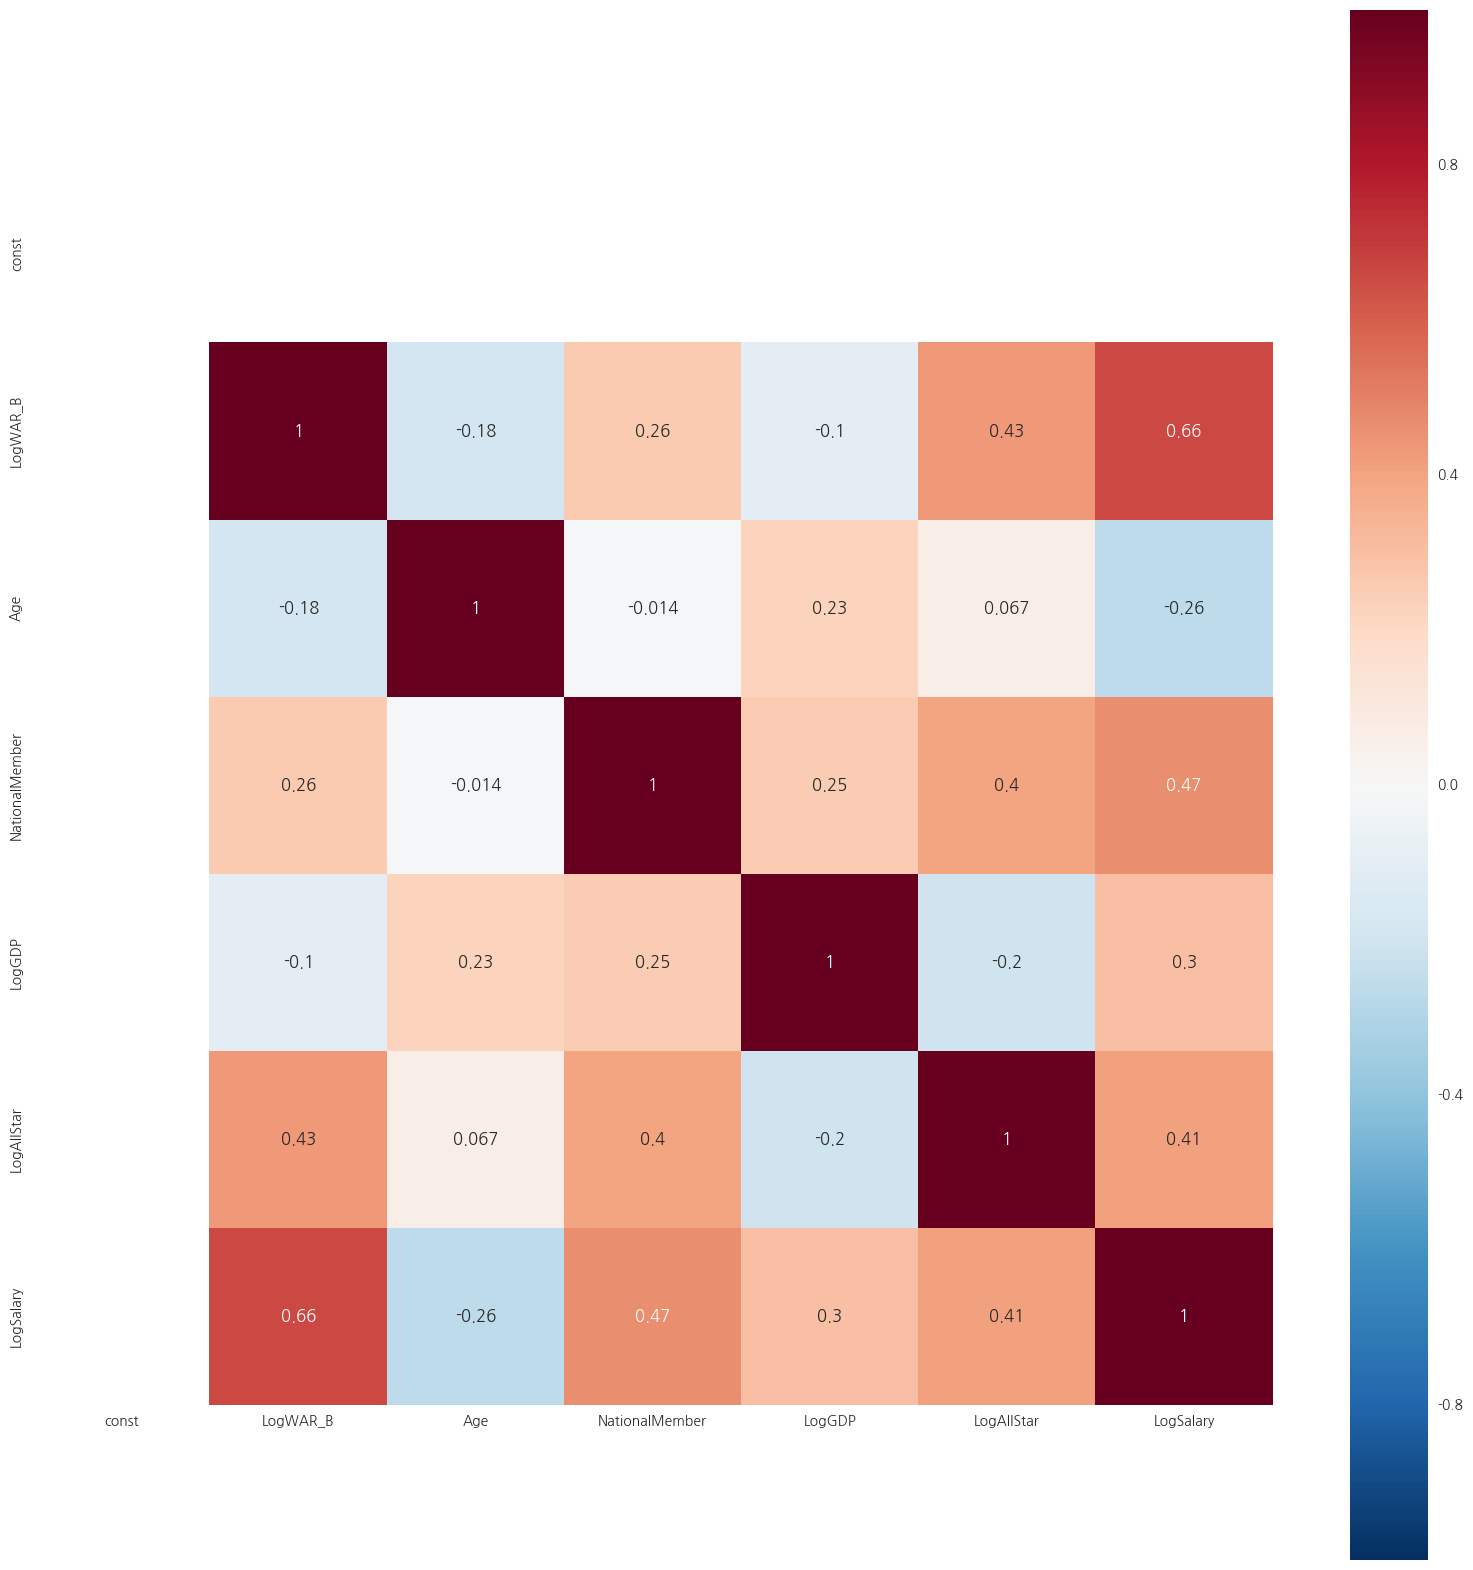

In [153]:
plt.figure(figsize=(20,20))
cormat = df_hitter2.corr()
sns.heatmap(cormat, square=True, annot=True)
plt.savefig('heatmap')

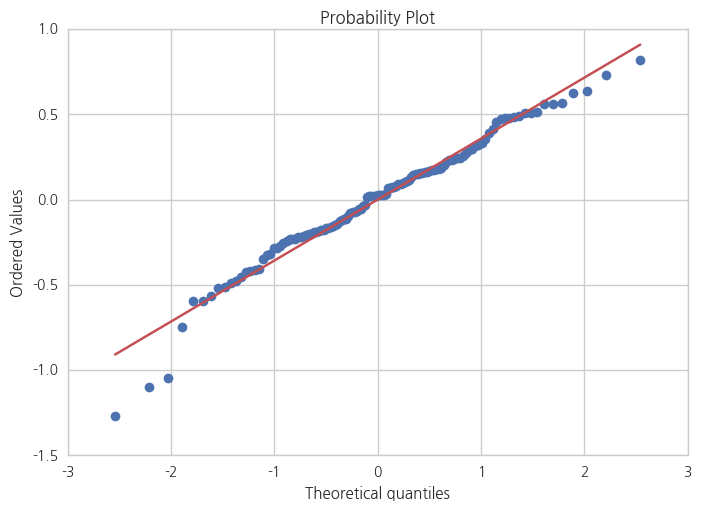

In [154]:
plt.figure()
sp.stats.probplot(result_sm2.resid, plot=plt)
plt.show()

# 아웃라이어 제거

In [155]:
influence = result_sm2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df_hitter2)-2)
idx = np.where(cooks_d2 < fox_cr)[0]
df_hitter3 = df_hitter2.ix[idx+1,:]

In [156]:
model_sm3 = sm.OLS(df_hitter3.ix[:,-1], df_hitter3.ix[:, :-1])
result_sm3 = model_sm3.fit()
print(result_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     73.03
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           1.73e-33
Time:                        07:23:17   Log-Likelihood:                -20.709
No. Observations:                 117   AIC:                             53.42
Df Residuals:                     111   BIC:                             69.99
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.2526      1.566     -6.

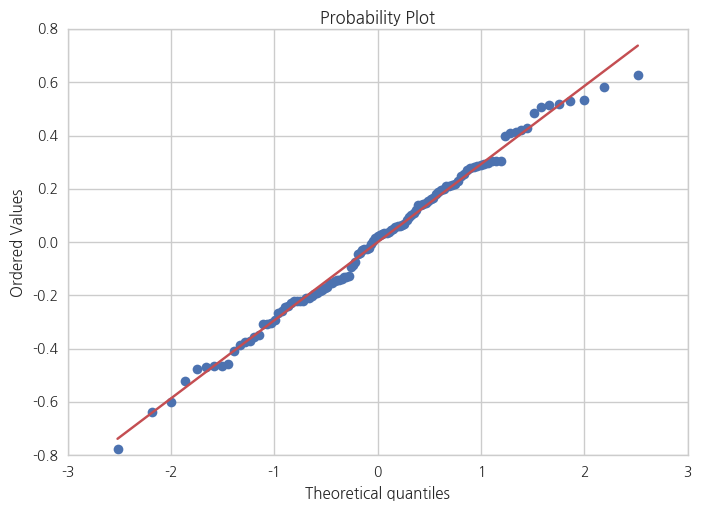

In [157]:
plt.figure()
sp.stats.probplot(result_sm3.resid, plot=plt)
plt.show()

# censored data 확인

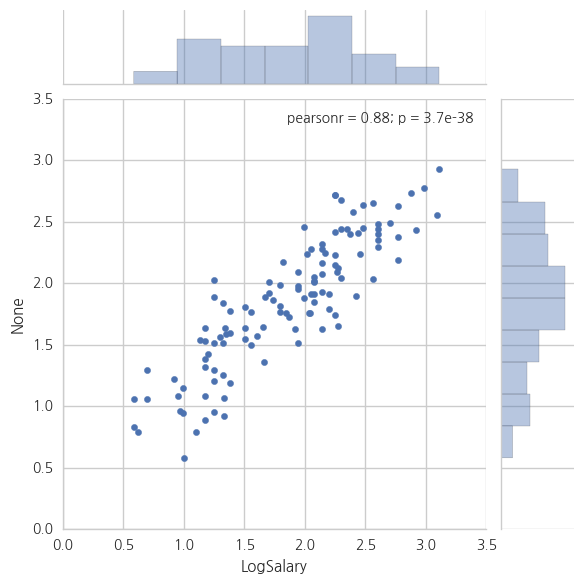

In [158]:
sns.jointplot(df_hitter3['LogSalary'], result_sm3.fittedvalues)
plt.show()

# cross validation

In [177]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression

model = LinearRegression()
cv = KFold(len(df_hitter3.ix[:,:-1]),10)
cross_val_score(model, df_hitter3.ix[:,:-1], df_hitter3.ix[:,-1],'r2',cv)

array([ 0.6059288 ,  0.45429166,  0.55688978,  0.62335899,  0.72769138,
        0.70462798,  0.58845044,  0.79594728,  0.82385783,  0.69508279])

In [178]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model_lasso = Ridge(alpha=0.1).fit(df_hitter3.ix[:,:-1],df_hitter3.ix[:,-1])
print(model_lasso.coef_)

[ 0.          0.61369635 -0.0854556   0.19426928  0.97609449  0.23310224]


In [171]:
a=cross_val_score(model_lasso, df_hitter3.ix[:,:-1], df_hitter3.ix[:,-1],'r2',cv)
a.mean()

0.65811296623591597

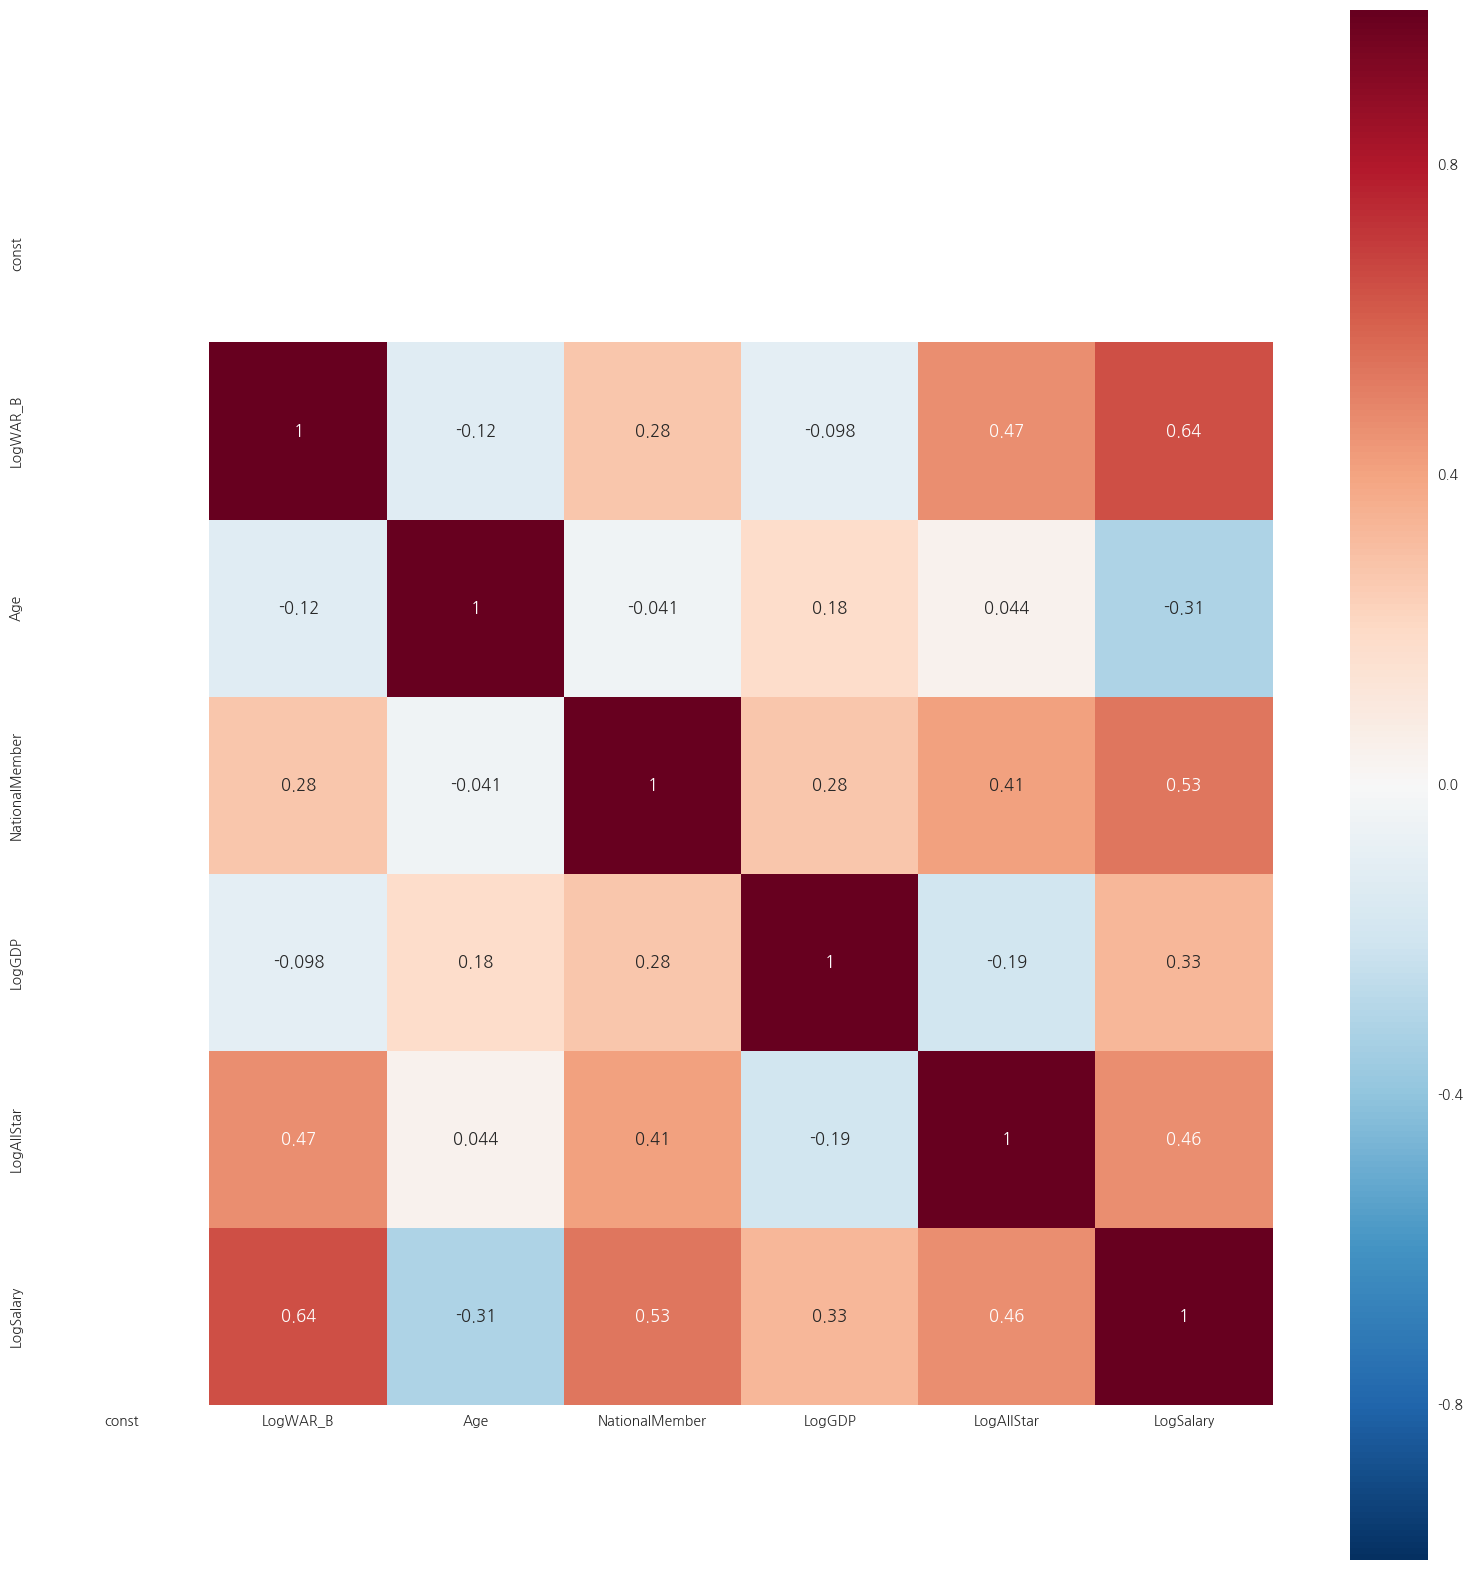

In [172]:
plt.figure(figsize=(20,20))
cormat = df_hitter3.corr()
sns.heatmap(cormat, square=True, annot=True)
plt.savefig('heatmap')

# 스케일링

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [174]:
df_hitter4 = pd.DataFrame(scaler.fit_transform(df_hitter3.ix[:,1:]), columns=df_hitter3.columns[1:])
df_hitter4 = sm.add_constant(df_hitter4)

In [175]:
model_sm4 = sm.OLS(df_hitter4.ix[:,-1], df_hitter4.ix[:,:-1])
result_sm4 = model_sm4.fit()
print(result_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     73.03
Date:                Tue, 14 Mar 2017   Prob (F-statistic):           1.73e-33
Time:                        07:33:26   Log-Likelihood:                -80.827
No. Observations:                 117   AIC:                             173.7
Df Residuals:                     111   BIC:                             190.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.592e-15      0.046  -1.44e

In [185]:
model = LinearRegression()
cv = KFold(len(df_hitter4.ix[:,:-1]),10)
cross_val_score(model, df_hitter4.ix[:,:-1], df_hitter4.ix[:,-1],'r2',cv)

array([ 0.6059288 ,  0.45429166,  0.55688978,  0.62335899,  0.72769138,
        0.70462798,  0.58845044,  0.79594728,  0.82385783,  0.69508279])

In [186]:
a=cross_val_score(model, df_hitter4.ix[:,:-1], df_hitter4.ix[:,-1],'r2',cv)
a.mean()

0.65761269540580902